# <font style="color:black">Getting Started with Images</font>

This notebook will help you take your first steps in learning Image Processing and Computer Vision using OpenCV. You will learn some important lessons using some simple examples. In this notebook, you will learn the following:

* Reading an image
* Check image attributes like datatype and shape
* Matrix representation of an image in Numpy
* Color Images and splitting/merging image channels
* Displaying images using matplotlib
* Saving images

##  <font style="color:black">Import Libraries</font>

In [1]:
import cv2
import numpy as np

In [3]:
cv2.__version__

'4.12.0'

In [5]:
img = np.ones((3,3,3),dtype=int)
img

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]])

In [ ]:
img.shape

(3, 3, 3)

In [ ]:
cv2.add(img, 20)

array([[[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]],

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]],

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]]])

In [9]:
%pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.9 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 3.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 3.9 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 4.4 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 4.3 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 4.2 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.9 MB/s  0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:-

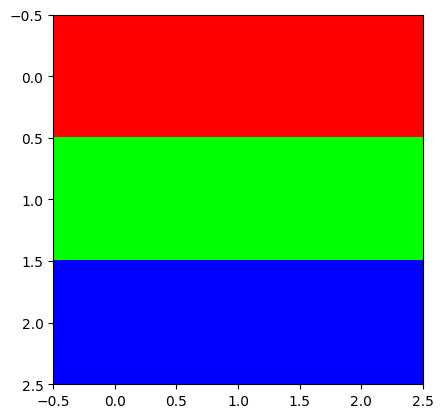

In [19]:
n=np.array([
    [[1,0,0], [1,0,0], [1,0,0]],  # Red row
    [[0,1,0], [0,1,0], [0,1,0]],  # Green row
    [[0,0,1], [0,0,1], [0,0,1]]   # Blue row
])
t=(n*255).astype(np.uint8)
import matplotlib.pyplot as plt
plt.imshow(t)
plt.show()

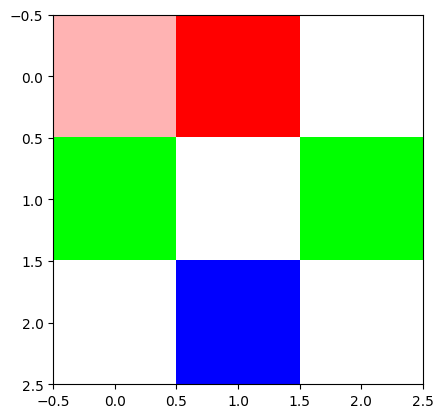

In [18]:
n=np.array([
    [[1,0,0,0.3], [1,0,0,1], [1,0,0,0]],  # Red row
    [[0,1,0,1], [0,1,0,0], [0,1,0,1]],  # Green row
    [[0,0,1,0], [0,0,1,1], [0,0,1,0]]   # Blue row
])
t=(n*255).astype(np.uint8)
import matplotlib.pyplot as plt
plt.imshow(t)
plt.show()

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

##  <font style="color:black">Download Assets</font>

The `download_and_unzip(...)` is used to download and extract the notebook assests.

In [12]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [13]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

The opencv_bootcamp_assets_NB1.zip` file includes also contains the additional **display_image.py** python script.

##  <font style="color:black">Display Image Directly</font>
We will use the following as our sample images. We will use the ipython image function to load and display the image.

In [14]:
# Display 18x18 pixel image.
Image(filename="checkerboard_18x18.png")

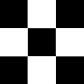

In [15]:
# Display 84x84 pixel image.
Image(filename="checkerboard_84x84.jpg")

# <font style="color:black">Reading images using OpenCV</font>

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the **`cv2.imread()`** function which has the following syntax:

### <font color="green">Function Syntax </font>

``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.

2. `Flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


### <font color="green">OpenCV Documentation</font>

1. **`Imread`**:  <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56" target="_blank">Documentation link</a>

2. **`ImreadModes`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80" target="_blank">Documentation link</a>


In [21]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png", 0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

## Display Image attributes

In [22]:
# print the size  of image
print("Image size (H, W) is:", cb_img.shape)

# print data-type of image
print("Data type of image is:", cb_img.dtype)

Image size (H, W) is: (18, 18)
Data type of image is: uint8


## Display Images using Matplotlib

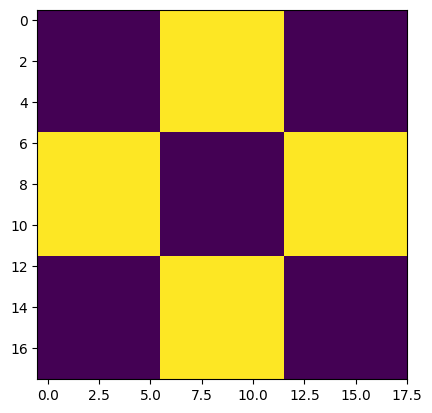

In [23]:
# Display image.
plt.imshow(cb_img)

### What happened?

Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using `imshow()`. matplotlib uses different color maps and it's possible that the gray scale color map is not set.

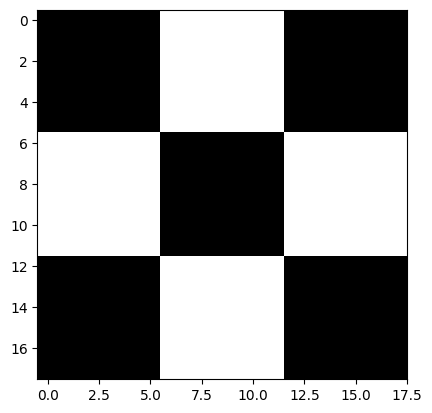

In [24]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")

## Another example

[[[  0   0   0]
  [  0   0   0]
  [ 15  15  15]
  [ 20  20  20]
  [  1   1   1]
  [134 134 134]
  [233 233 233]
  [253 253 253]
  [253 253 253]
  [253 253 253]
  [255 255 255]
  [229 229 229]
  [130 130 130]
  [  1   1   1]
  [ 29  29  29]
  [  2   2   2]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  1   1   1]
  [  5   5   5]
  [ 18  18  18]
  [  0   0   0]
  [137 137 137]
  [232 232 232]
  [255 255 255]
  [254 254 254]
  [247 247 247]
  [255 255 255]
  [228 228 228]
  [129 129 129]
  [  0   0   0]
  [ 24  24  24]
  [  2   2   2]
  [  0   0   0]
  [  0   0   0]]

 [[  7   7   7]
  [  5   5   5]
  [  2   2   2]
  [ 28  28  28]
  [  2   2   2]
  [139 139 139]
  [230 230 230]
  [254 254 254]
  [255 255 255]
  [249 249 249]
  [255 255 255]
  [226 226 226]
  [128 128 128]
  [  0   0   0]
  [ 27  27  27]
  [  3   3   3]
  [  2   2   2]
  [  2   2   2]]

 [[ 25  25  25]
  [ 27  27  27]
  [ 28  28  28]
  [ 38  38  38]
  [  0   0   0]
  [129 129 129]
  [236 236 236]
  [255 255 255]
  

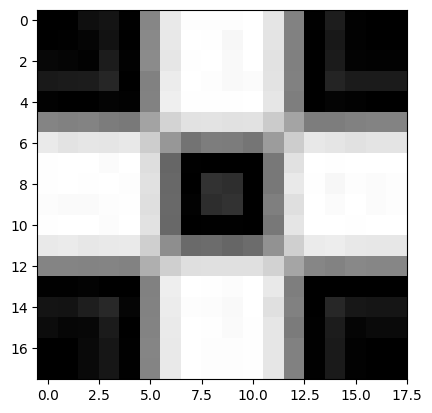

In [29]:
# Read image as gray scale.
cb_img_fuzzy = cv2.imread("checkerboard_fuzzy_18x18.jpg", 1)

# print image
print(cb_img_fuzzy)

# Display image.
#plt.imshow(cb_img_fuzzy)

plt.imshow(cv2.cvtColor(cb_img_fuzzy, cv2.COLOR_BGR2RGB))
plt.show()


## Working with Color Images
Until now, we have been using gray scale images in our discussion. Let us now discuss color images.

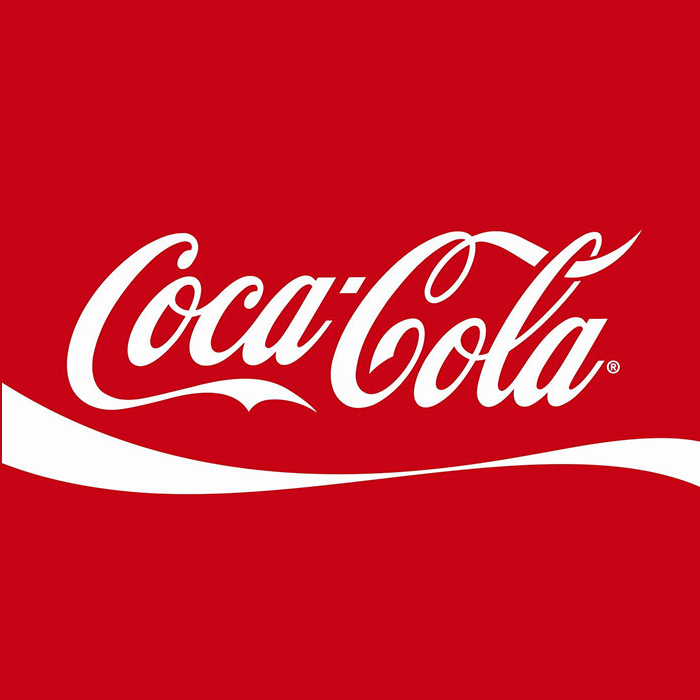

In [ ]:
# Read and display Coca-Cola logo.
Image("coca-cola-logo.png")

## Read and display color image
Let us read a color image and check the parameters. Note the image dimension.

In [27]:
# Read in image
coke_img = cv2.imread("coca-cola-logo.png", 1)
print(coke_img)

# print the size  of image
print("Image size (H, W, C) is:", coke_img.shape)

# print data-type of image
print("Data type of image is:", coke_img.dtype)

[[[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 ...

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]]
Image size (H, W, C) is: (700, 700, 3)
Data type of image is: uint8


## Display the Image

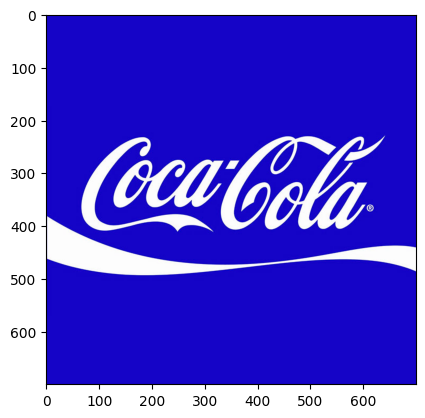

In [ ]:
plt.imshow(coke_img)
#  What happened?

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

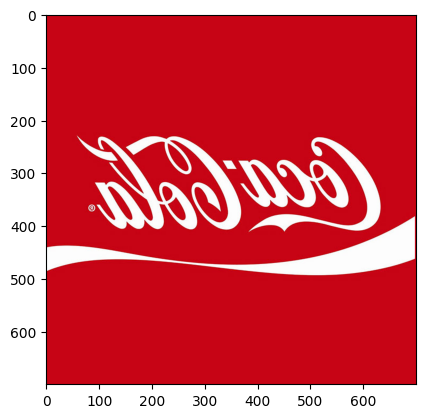

In [31]:
coke_img_channels_reversed = coke_img[:, ::-1, ::-1]#height width and channels
plt.imshow(coke_img_channels_reversed)

## Splitting and Merging Color Channels


* **`cv2.split()`** Divides a multi-channel array into several single-channel arrays.

* **`cv2.merge()`** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

<a href="https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a" target="_blank">Documentation link</a>

Text(0.5, 1.0, 'Merged Output')

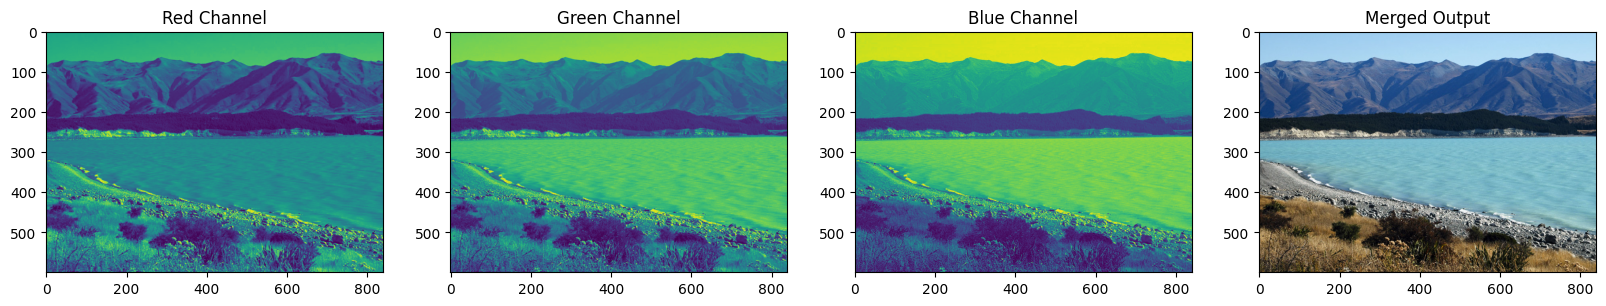

In [38]:
# Split the image into the B,G,R components
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r);plt.title("Red Channel")#if the image is dark then that colour is less in the image
plt.subplot(142);plt.imshow(g);plt.title("Green Channel")
plt.subplot(143);plt.imshow(b);plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

## Converting to different Color Spaces


**`cv2.cvtColor()`** Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv2.cvtColor( src, code )
```

`dst`: Is the output image of the same size and depth as `src`.

The function has **2 required arguments**:

1. `src` input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.

2. `code` color space conversion code (see ColorConversionCodes).

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

1. **`cv2.cvtColor`**: <a href="https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab" target="_blank">Documentation link</a>  

2. **`ColorConversionCodes`**: <a href="https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0" target="_blank">Documentation link</a>


### Changing from BGR to RGB

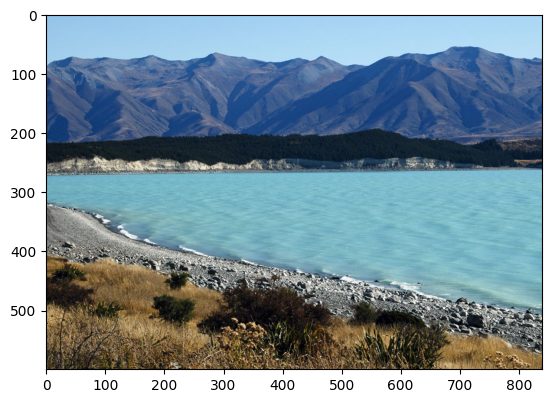

In [35]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

### Changing to HSV color space

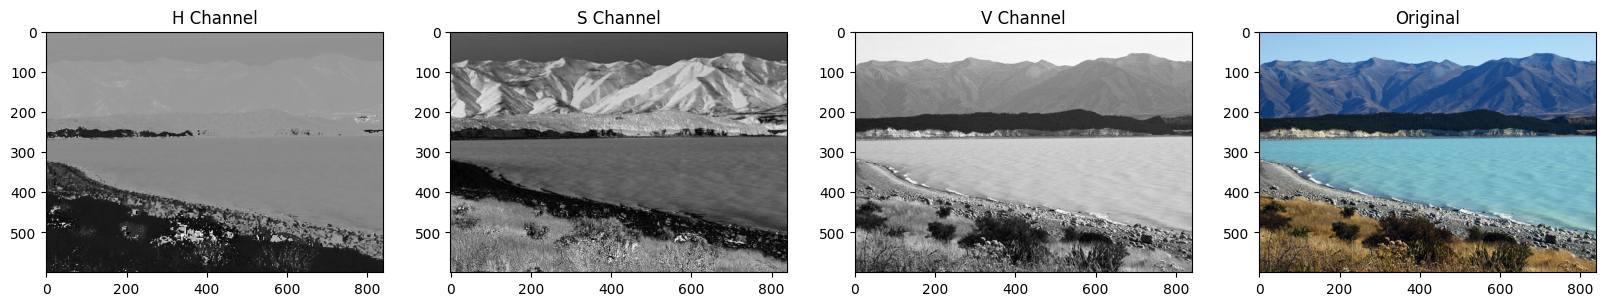

In [37]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the H,S,V components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

## Modifying individual Channel

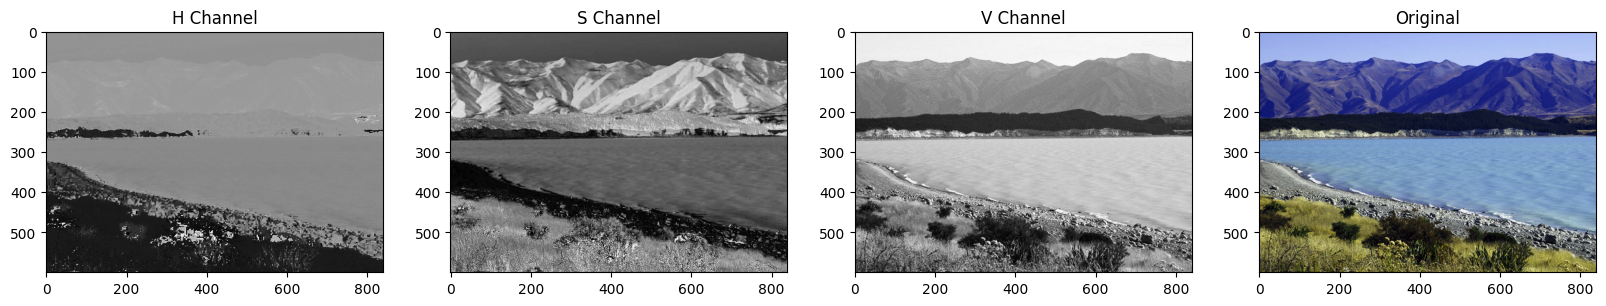

In [ ]:
h_new = h + 10
img_NZ_merged = cv2.merge((h_new, s, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

## Saving Images

Saving the image is as trivial as reading an image in OpenCV. We use the function **`cv2.imwrite()`** with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).


### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
cv2.imwrite( filename, img[, params] )
```

The function has **2 required arguments**:

1. `filename`: This can be an **absolute** or **relative** path.

2. `img`: Image or Images to be saved.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

1. **`Imwrite`**: <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce" target="_blank">Documentation link</a>

2. **`ImwriteFlags`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac" target="_blank">Documentation link</a>

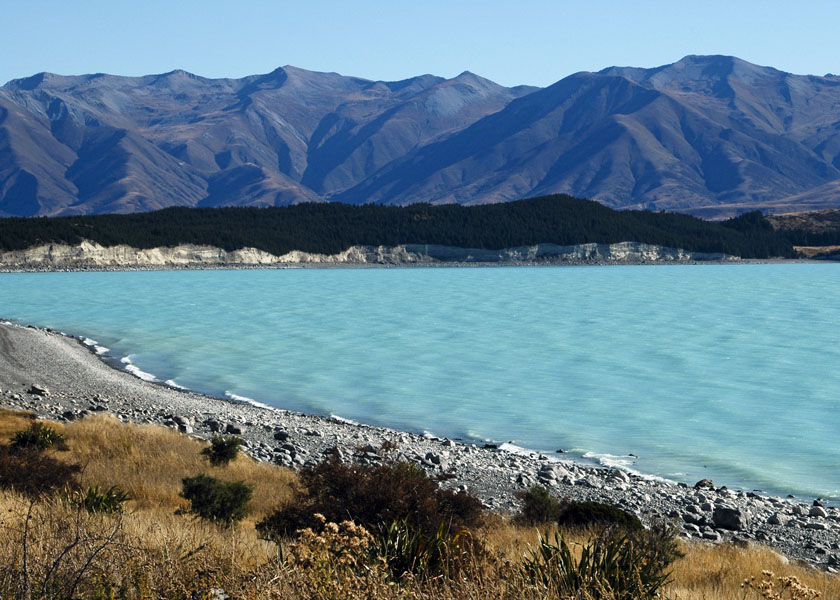

In [ ]:
# save the image
cv2.imwrite("New_Zealand_Lake_SAVED.png", img_NZ_bgr)

Image(filename='New_Zealand_Lake_SAVED.png')

In [ ]:
# read the image as Color
img_NZ_bgr = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape (H, W, C) is:", img_NZ_bgr.shape)

# read the image as Grayscaled
img_NZ_gry = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape (H, W) is:", img_NZ_gry.shape)

img_NZ_bgr shape (H, W, C) is: (600, 840, 3)
img_NZ_gry shape (H, W) is: (600, 840)


## Thank You!